In [3]:
# section 1 load all the necessary modules and packages
import glob
import time
import netCDF4 as nc4 
import numpy as np
import pandas as pd
import xarray as xr
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import matplotlib
import warnings
import sys
import os
import platform
import shutil
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 30}
font = {'family' : 'Nimbus Roman',
        'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)


0.8589015151515151 0.9249999999999999


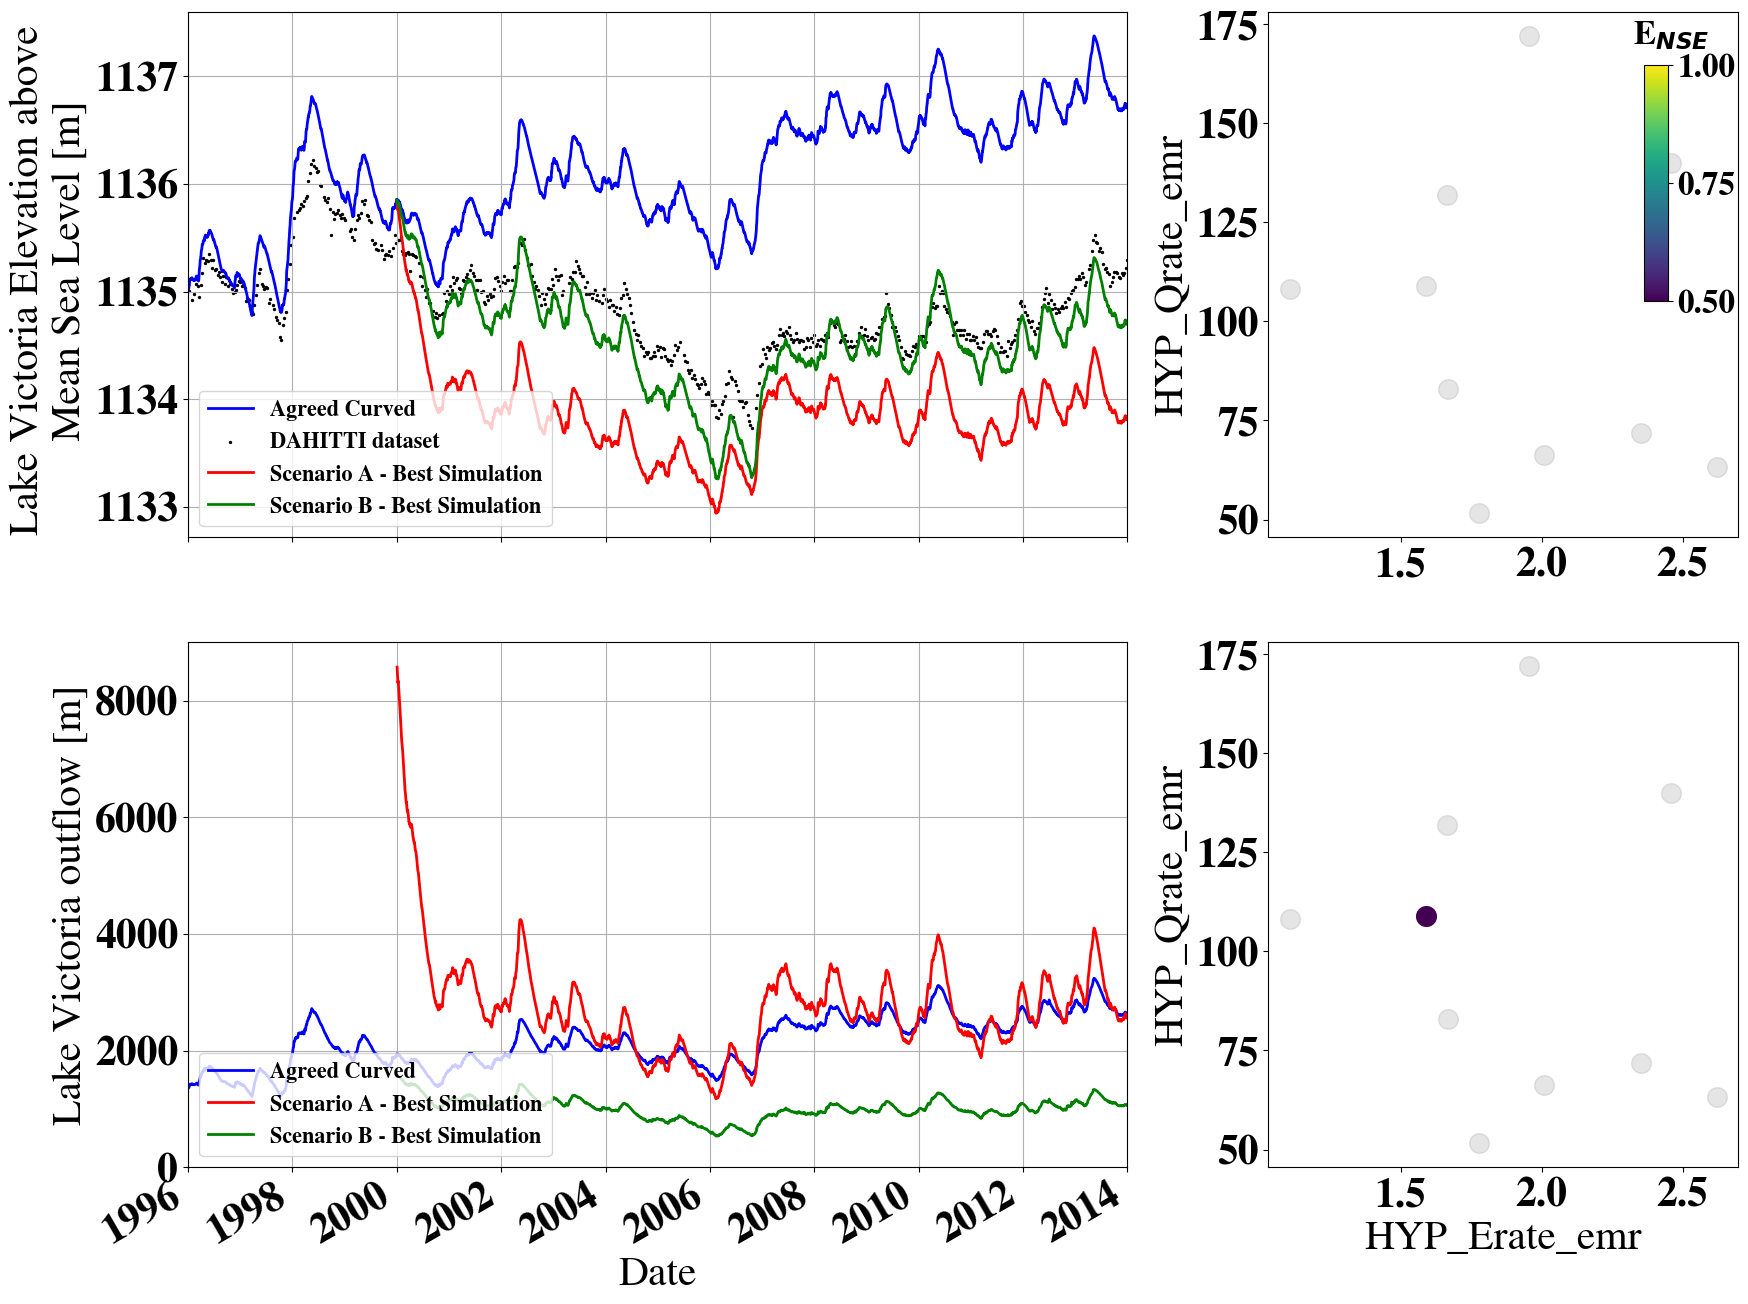

In [4]:
# plot stage values
fig, axes = plt.subplots(2, 2, figsize=(20, 15),
                         gridspec_kw={'wspace': 0.20,
                                      'hspace': 0.20,
                                      'width_ratios': [4, 2],
                                      'height_ratios': [2, 2]})

# Now you can access each individual axis using indexing, for example:
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]

fig.patch.set_facecolor('white')

############################################
# plot lake level with various senacrios ax1
############################################
start_year = '1996-01-01'
end_year   = '2014-01-01'

# get historial values with simulation
ds = xr.open_dataset('../mizuRoute_output_all/sim_hist.nc')
ds = ds.sel(time=slice(start_year,end_year))
ds['ele_sim'] = ds['IRFvolume'].copy()
ds['ele_sim'][:] = ds['ele_sim'][:]/(68800*10**6)
ds['ele_sim'][:] = ds['ele_sim'][:] + 1122.86
ds['ele_sim'][:,1].plot(color='b', linewidth=2, ax=ax1)

ds = xr.open_dataset('../mizuRoute_output_all/sim_00001.nc')
ds = ds.sel(time=slice(start_year,end_year))
ds['ele_sim'] = ds['IRFvolume'].copy()
ds['ele_sim'][:] = ds['ele_sim'][:]/(68800*10**6)
ds['ele_sim'][:] = ds['ele_sim'][:] + 1122.86
ds['ele_sim'][:,1].plot(color='b', label='Agreed Curved', linewidth=2, ax=ax1)

# read the Dahitti data set
lake_elevation = pd.read_csv('../data/DAHITI_Data/Lake_Victoria.csv')
#print(lake_elevation)
lake_elevation['date']  = pd.DatetimeIndex(lake_elevation['date'])
lake_elevation = lake_elevation.set_index('date')
lake_elevation = lake_elevation[start_year: end_year]
#print(lake_elevation)
ax1.scatter(lake_elevation.index, lake_elevation['water_level'], s=2, label='DAHITTI dataset', c='k')

# find the best simulation based on NSE and plot scenario-A
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')
obj_par = obj_par[obj_par['scale_factor_Ep_temp']<1.1]
obj_par = obj_par[obj_par['scale_factor_P_temp']<1.1]
obj_par = obj_par[0.90<obj_par['scale_factor_Ep_temp']]
obj_par = obj_par[0.90<obj_par['scale_factor_P_temp']]
obj_par = obj_par.sort_values(by='1_NSE')
obj_par
m = obj_par.head(1).index.item()+1
#print(obj_par)
ds = xr.open_dataset('../mizuRoute_output_all/sim_'+str(m).zfill(5)+'.nc')
ds['ele_sim'] = ds['IRFvolume'].copy()
ds['ele_sim'][:] = ds['ele_sim'][:]/(68800*10**6)
ds['ele_sim'][:] = ds['ele_sim'][:] + 1122.86
ds['ele_sim'][:,1].plot(color='r', label='Scenario A - Best Simulation', linewidth=2, ax=ax1)

# find the best simulation based on NSE and plot scenario-B
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')
obj_par = obj_par.sort_values(by='1_NSE')
obj_par
m = obj_par.head(1).index.item()+1
#print(obj_par)
ds = xr.open_dataset('../mizuRoute_output_all/sim_'+str(m).zfill(5)+'.nc')
ds['ele_sim'] = ds['IRFvolume'].copy()
ds['ele_sim'][:] = ds['ele_sim'][:]/(68800*10**6)
ds['ele_sim'][:] = ds['ele_sim'][:] + 1122.86
ds['ele_sim'][:,1].plot(color='g', label='Scenario B - Best Simulation', linewidth=2, ax=ax1)

ax1.set_xlim(pd.Timestamp(start_year), pd.Timestamp(end_year))
ax1.grid(True)
ax1.legend(loc=3, fontsize=16)

ax1.set_xticklabels([])
#ax1.set_xticks([])

ax1.set_ylabel('Lake Victoria Elevation above \n Mean Sea Level [m]')
ax1.set_xlabel(' ')

##############################
# Create a figure and axes ax3
##############################
start_year = '2000-01-03'
end_year   = '2014-01-01'

# get historial values with simulation
ds = xr.open_dataset('../mizuRoute_output_all/sim_hist.nc')
#ds = ds.sel(time=slice(start_year,end_year))
ds['IRFroutedRunoff'][:,0].plot(color='b', linewidth=2, ax = ax3)

ds = xr.open_dataset('../mizuRoute_output_all/sim_00001.nc')
ds = ds.sel(time=slice(start_year,end_year))
ds['IRFroutedRunoff'][:,0].plot(color='b', label='Agreed Curved', linewidth=2, ax = ax3)

# find the best simulation based on NSE and plot Scenario - A
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')
obj_par = obj_par[obj_par['scale_factor_Ep_temp']<1.1]
obj_par = obj_par[obj_par['scale_factor_P_temp']<1.1]
obj_par = obj_par[0.90<obj_par['scale_factor_Ep_temp']]
obj_par = obj_par[0.90<obj_par['scale_factor_P_temp']]
obj_par = obj_par.sort_values(by='1_NSE')
obj_par
m = obj_par.head(1).index.item()+1
#print(obj_par)
ds = xr.open_dataset('../mizuRoute_output_all/sim_'+str(m).zfill(5)+'.nc')
ds = ds.sel(time=slice(start_year,end_year))
ds['IRFroutedRunoff'][:,0].plot(color='r', label='Scenario A - Best Simulation', linewidth=2, ax = ax3)

# find the best simulation based on NSE and plot Scenario - B
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')
obj_par = obj_par.sort_values(by='1_NSE')
obj_par
m = obj_par.head(1).index.item()+1
#print(obj_par)
ds = xr.open_dataset('../mizuRoute_output_all/sim_'+str(m).zfill(5)+'.nc')
ds = ds.sel(time=slice(start_year,end_year))
ds['IRFroutedRunoff'][:,0].plot(color='g', label='Scenario B - Best Simulation', linewidth=2, ax = ax3)

start_year = '1996-01-01'
end_year   = '2014-01-01'
ax3.set_xlim(pd.Timestamp(start_year), pd.Timestamp(end_year))
ax3.set_ylim(0,None)
ax3.grid(True)
ax3.legend(loc=3, fontsize=16)

ax3.set_ylabel('Lake Victoria outflow [m]')
ax3.set_xlabel('Date')

############################
# create the dotty plots ax4
############################
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')
obj_par['NSE'] = 1-obj_par['1_NSE']
obj_par = obj_par.sort_values(by='NSE', ascending=False)
obj_par = obj_par.reset_index()
obj_par2 = obj_par.copy()
obj_par2 = obj_par2 [obj_par2['NSE']>0.5]
ax4.scatter(obj_par['HYP_Erate_emr'],\
                     obj_par['HYP_Qrate_emr'],\
                     s=200,\
                     c='grey',\
                     alpha = 0.2)
sc4 = ax4.scatter(obj_par2['HYP_Erate_emr'],\
                     obj_par2['HYP_Qrate_emr'],\
                     c=obj_par2['NSE'],\
                     s=200,
                     vmin=0.5,vmax=1.0,cmap = 'viridis')
ax4.set_xlabel('HYP_Erate_emr')
ax4.set_ylabel('HYP_Qrate_emr')
#ax4.set_title('Scenario with perturbation \n of climatic forcing')


###########################
# create the dotty plot ax2
###########################
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')

ax2.scatter(obj_par['HYP_Erate_emr'],\
            obj_par['HYP_Qrate_emr'],\
            c='grey',\
            s=200,\
            alpha = 0.2)

obj_par['NSE'] = 1-obj_par['1_NSE']
obj_par = obj_par [obj_par['NSE']>0.5]
obj_par = obj_par[obj_par['scale_factor_Ep_temp']<1.1]
obj_par = obj_par[obj_par['scale_factor_P_temp']<1.1]
obj_par = obj_par[0.90<obj_par['scale_factor_Ep_temp']]
obj_par = obj_par[0.90<obj_par['scale_factor_P_temp']]

ax2.scatter(obj_par['HYP_Erate_emr'],\
            obj_par['HYP_Qrate_emr'],\
            c=obj_par['NSE'],\
            s=200,\
            vmin=0.5,\
            vmax=1.0,\
            cmap = 'viridis')
ax2.set_ylabel('HYP_Qrate_emr')
#ax2.set_title('Scenario without perturbation \n of climatic forcing')

cax2 = ax2.inset_axes([0.80, 0.45, 0.05, 0.45])  # Define color bar axis
cbar2 = plt.colorbar(sc4, cax=cax2)
label_text = 'E$_{NSE}$'
label_x = cax2.get_position().x0 + cax2.get_position().width / 2
label_y = cax2.get_position().y1 + 0.08  # Adjust the vertical position as needed
print(label_x, label_y)
ax2.text(label_x, label_y, label_text, ha='center', va='bottom', transform=ax2.transAxes, fontsize=24)
cbar2.ax.tick_params(axis='both', which='both', labelsize=24)
cbar2.set_ticks([0.50, 0.75, 1.00])



if not os.path.isdir('../fig/'):
    os.makedirs('../fig/')
    
plt.savefig('../fig/lake_victoria_result.png')